In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("credit_limit_optimization_dataset.csv")

In [3]:
df.head()

,customer_id,age,gender,employment_length_years,annual_income,income_growth_rate,current_credit_limit,avg_monthly_spend_6m,credit_utilization_ratio,revolving_balance,...,hard_inquiries_6m,account_age_months,interest_rate,interest_income_6m,interchange_income_6m,annual_fee,total_revenue_6m,default_next_6m,optimal_limit_change_pct,limit_adjustment_decision
0,100000,59,Female,34,80865.181517,0.021488,24883.703325,4106.802434,0.281690,7009.500683,...,1,123,21.323878,747.348683,369.612219,150,1191.960902,1,-0.250646,0
1,100001,49,Male,25,77567.846835,-0.046969,12833.847851,2763.661604,0.335325,4303.514585,...,1,34,17.346081,373.245564,248.729544,95,669.475109,1,-0.247664,0
2,100002,35,Male,13,64554.910432,0.051170,14081.263009,2896.184939,0.300800,4235.639639,...,0,92,18.688013,395.778445,260.656645,0,656.435090,0,-0.000140,1
3,100003,63,Female,35,54337.771843,-0.005225,9474.257177,1350.919301,0.258751,2451.475218,...,2,25,21.927577,268.774559,121.582737,0,390.357296,1,-0.234896,0
4,100004,28,Female,6,37028.105446,0.066225,5921.536132,1166.402921,0.274111,1623.157167,...,1,134,13.225961,107.339069,104.976263,0,212.315332,1,-0.310357,0


In [4]:
df.isnull().sum()

customer_id                  0
age                          0
gender                       0
employment_length_years      0
annual_income                0
income_growth_rate           0
current_credit_limit         0
avg_monthly_spend_6m         0
credit_utilization_ratio     0
revolving_balance            0
payment_ratio                0
min_payment_flag             0
days_past_due_30_6m          0
days_past_due_60_6m          0
delinquencies_12m            0
credit_score                 0
credit_score_trend_6m        0
debt_to_income_ratio         0
external_loans_count         0
hard_inquiries_6m            0
account_age_months           0
interest_rate                0
interest_income_6m           0
interchange_income_6m        0
annual_fee                   0
total_revenue_6m             0
default_next_6m              0
optimal_limit_change_pct     0
limit_adjustment_decision    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customer_id                50000 non-null  int64  
 1   age                        50000 non-null  int64  
 2   gender                     50000 non-null  object 
 3   employment_length_years    50000 non-null  int64  
 4   annual_income              50000 non-null  float64
 5   income_growth_rate         50000 non-null  float64
 6   current_credit_limit       50000 non-null  float64
 7   avg_monthly_spend_6m       50000 non-null  float64
 8   credit_utilization_ratio   50000 non-null  float64
 9   revolving_balance          50000 non-null  float64
 10  payment_ratio              50000 non-null  float64
 11  min_payment_flag           50000 non-null  int64  
 12  days_past_due_30_6m        50000 non-null  int64  
 13  days_past_due_60_6m        50000 non-null  int

In [6]:
# Featur Engineering

In [7]:
df = df.drop(columns="customer_id")

In [8]:
df.head()

,age,gender,employment_length_years,annual_income,income_growth_rate,current_credit_limit,avg_monthly_spend_6m,credit_utilization_ratio,revolving_balance,payment_ratio,...,hard_inquiries_6m,account_age_months,interest_rate,interest_income_6m,interchange_income_6m,annual_fee,total_revenue_6m,default_next_6m,optimal_limit_change_pct,limit_adjustment_decision
0,59,Female,34,80865.181517,0.021488,24883.703325,4106.802434,0.281690,7009.500683,0.389787,...,1,123,21.323878,747.348683,369.612219,150,1191.960902,1,-0.250646,0
1,49,Male,25,77567.846835,-0.046969,12833.847851,2763.661604,0.335325,4303.514585,0.660657,...,1,34,17.346081,373.245564,248.729544,95,669.475109,1,-0.247664,0
2,35,Male,13,64554.910432,0.051170,14081.263009,2896.184939,0.300800,4235.639639,0.990684,...,0,92,18.688013,395.778445,260.656645,0,656.435090,0,-0.000140,1
3,63,Female,35,54337.771843,-0.005225,9474.257177,1350.919301,0.258751,2451.475218,0.808854,...,2,25,21.927577,268.774559,121.582737,0,390.357296,1,-0.234896,0
4,28,Female,6,37028.105446,0.066225,5921.536132,1166.402921,0.274111,1623.157167,0.523612,...,1,134,13.225961,107.339069,104.976263,0,212.315332,1,-0.310357,0


In [9]:
# Encoding Gender Column

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
print(le.classes_)
mapping = dict(zip(le.classes_, range(len(le.classes_))))
print(mapping)

['Female' 'Male']
{'Female': 0, 'Male': 1}


In [11]:
df.head()

,age,gender,employment_length_years,annual_income,income_growth_rate,current_credit_limit,avg_monthly_spend_6m,credit_utilization_ratio,revolving_balance,payment_ratio,...,hard_inquiries_6m,account_age_months,interest_rate,interest_income_6m,interchange_income_6m,annual_fee,total_revenue_6m,default_next_6m,optimal_limit_change_pct,limit_adjustment_decision
0,59,0,34,80865.181517,0.021488,24883.703325,4106.802434,0.281690,7009.500683,0.389787,...,1,123,21.323878,747.348683,369.612219,150,1191.960902,1,-0.250646,0
1,49,1,25,77567.846835,-0.046969,12833.847851,2763.661604,0.335325,4303.514585,0.660657,...,1,34,17.346081,373.245564,248.729544,95,669.475109,1,-0.247664,0
2,35,1,13,64554.910432,0.051170,14081.263009,2896.184939,0.300800,4235.639639,0.990684,...,0,92,18.688013,395.778445,260.656645,0,656.435090,0,-0.000140,1
3,63,0,35,54337.771843,-0.005225,9474.257177,1350.919301,0.258751,2451.475218,0.808854,...,2,25,21.927577,268.774559,121.582737,0,390.357296,1,-0.234896,0
4,28,0,6,37028.105446,0.066225,5921.536132,1166.402921,0.274111,1623.157167,0.523612,...,1,134,13.225961,107.339069,104.976263,0,212.315332,1,-0.310357,0


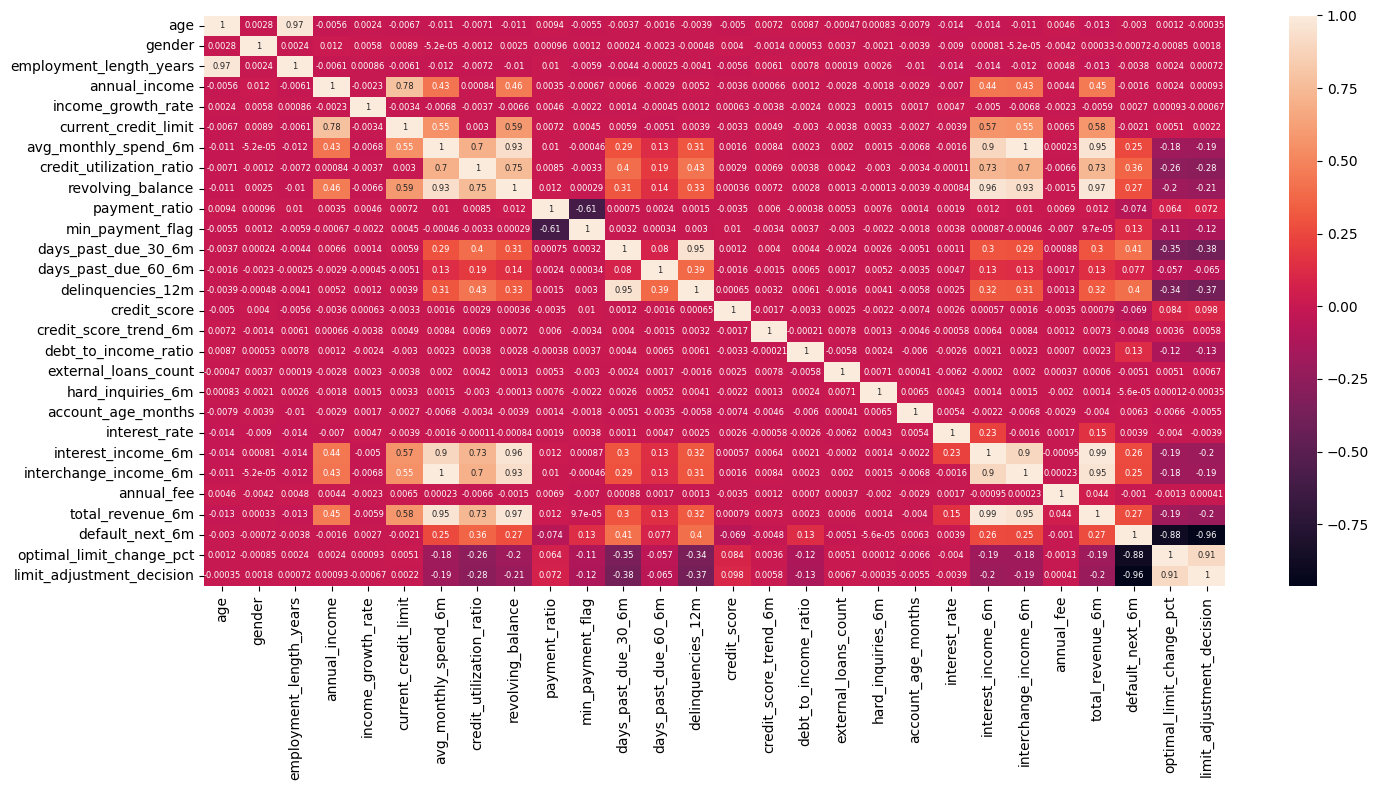

In [14]:
corr = df.corr(numeric_only = True)

plt.figure(figsize=(15,8))
sns.heatmap(corr,
           annot=True,
           annot_kws={"size":6})

plt.tight_layout()
plt.show()

In [15]:
# Train, Test & split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    df.drop(columns="limit_adjustment_decision"),
    df["limit_adjustment_decision"],
    test_size=0.2,
    random_state=42
)

In [16]:
# Scaling Data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

model = LogisticRegression()
multi= OneVsRestClassifier(estimator=model)

In [19]:
multi.fit(X_train_scaled,y_train)

OneVsRestClassifier(estimator=LogisticRegression())

In [20]:
y_pred = multi.predict(X_test_scaled)

Accuracy : 0.9994
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5233
           1       1.00      1.00      1.00      4516
           2       1.00      0.99      0.99       251

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix : 
[[5230    3    0]
 [   0 4515    1]
 [   0    2  249]]


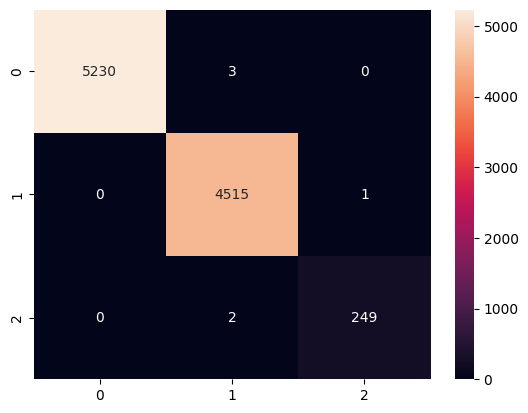

In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy : {accuracy_score(y_test,y_pred)}")
print(f"Classification Report: \n{classification_report(y_test,y_pred)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test,y_pred)}")

cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

In [22]:
# Checking Overfitting & Underfitting
y_train_pred = multi.predict(X_train_scaled)
y_test_pred = multi.predict(X_test_scaled)

print(f"Training Accuracy : {accuracy_score(y_train,y_train_pred)}")
print(f"Testing Accuracy : {accuracy_score(y_test, y_test_pred)}")

Training Accuracy : 0.999325
Testing Accuracy : 0.9994


In [23]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(multi, X_train_scaled, y_train, cv=5)

print("Cross-validation accuracy:", scores.mean())


Cross-validation accuracy: 0.9989750000000001


# Perform Clustering Without labels

In [24]:
dataset = pd.read_csv("credit_limit_optimization_dataset.csv")

In [25]:
dataset.head()

,customer_id,age,gender,employment_length_years,annual_income,income_growth_rate,current_credit_limit,avg_monthly_spend_6m,credit_utilization_ratio,revolving_balance,...,hard_inquiries_6m,account_age_months,interest_rate,interest_income_6m,interchange_income_6m,annual_fee,total_revenue_6m,default_next_6m,optimal_limit_change_pct,limit_adjustment_decision
0,100000,59,Female,34,80865.181517,0.021488,24883.703325,4106.802434,0.281690,7009.500683,...,1,123,21.323878,747.348683,369.612219,150,1191.960902,1,-0.250646,0
1,100001,49,Male,25,77567.846835,-0.046969,12833.847851,2763.661604,0.335325,4303.514585,...,1,34,17.346081,373.245564,248.729544,95,669.475109,1,-0.247664,0
2,100002,35,Male,13,64554.910432,0.051170,14081.263009,2896.184939,0.300800,4235.639639,...,0,92,18.688013,395.778445,260.656645,0,656.435090,0,-0.000140,1
3,100003,63,Female,35,54337.771843,-0.005225,9474.257177,1350.919301,0.258751,2451.475218,...,2,25,21.927577,268.774559,121.582737,0,390.357296,1,-0.234896,0
4,100004,28,Female,6,37028.105446,0.066225,5921.536132,1166.402921,0.274111,1623.157167,...,1,134,13.225961,107.339069,104.976263,0,212.315332,1,-0.310357,0


In [26]:
dataset = dataset.drop(columns="customer_id")

In [27]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

dataset["gender"] = LE.fit_transform(dataset["gender"])

In [28]:
X = dataset.drop(columns="limit_adjustment_decision")
y = dataset['limit_adjustment_decision']

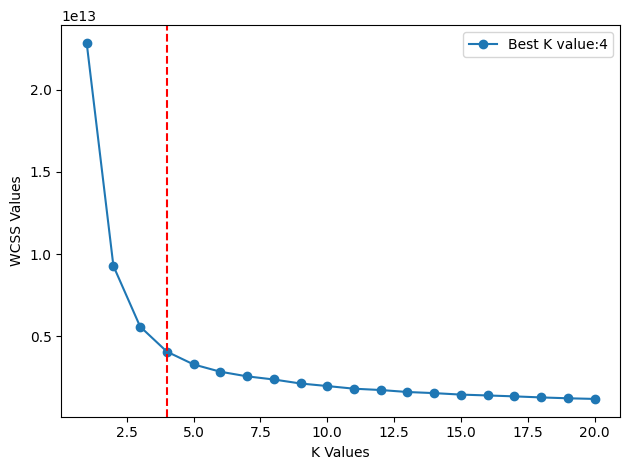

In [34]:
# find best k-value
from sklearn.cluster import KMeans
from kneed import KneeLocator

wcss = []

for k in range(1,21):
    Kmeans = KMeans(n_clusters=k)
    label = Kmeans.fit_predict(X)
    wcss.append(Kmeans.inertia_)

knee = KneeLocator(range(1,21),wcss,curve="convex",direction="decreasing")

plt.plot(range(1,21),wcss,marker='o',label=f"Best K value:{knee.elbow}")
plt.axvline(knee.elbow,c='red',linestyle='--')
plt.xlabel("K Values")
plt.ylabel("WCSS Values")
plt.legend()
plt.tight_layout()
plt.show()

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X)

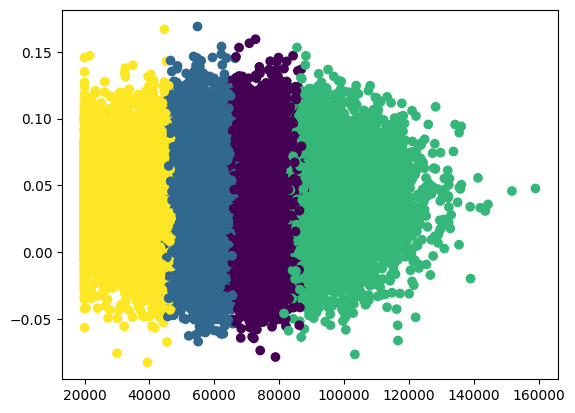

In [36]:
plt.scatter(x=X.iloc[:,3],y=X.iloc[:,4],c=labels)

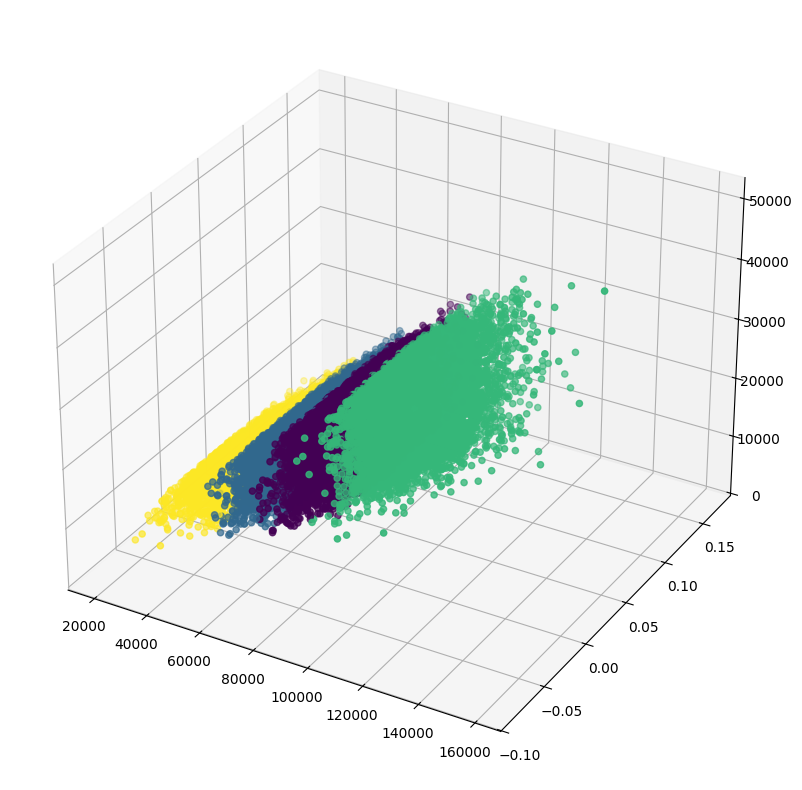

In [37]:
# 3D plot
fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111,projection='3d')
ax.scatter(xs=X.iloc[:,3],ys=X.iloc[:,4],zs=X.iloc[:,5],c=labels)
plt.tight_layout()
plt.show()

In [39]:
X["clusters"] = labels

<Axes: xlabel='clusters', ylabel='count'>

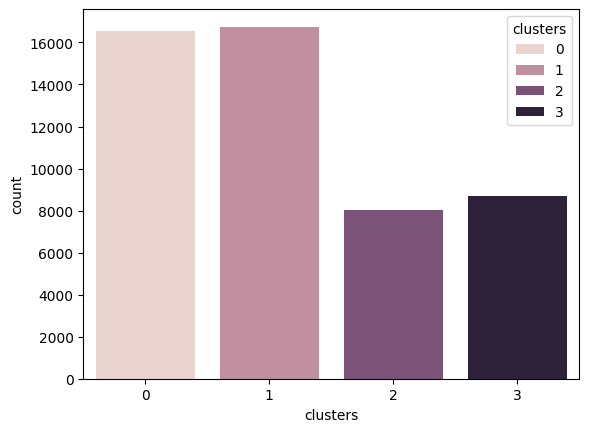

In [41]:
sns.countplot(x=X['clusters'],hue=X['clusters'])

<Axes: xlabel='annual_income', ylabel='avg_monthly_spend_6m'>

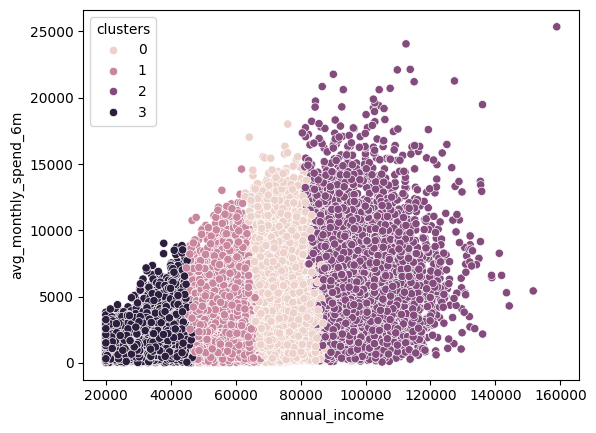

In [44]:
sns.scatterplot(x=X['annual_income'],y=X['avg_monthly_spend_6m'],hue=X['clusters'])

In [45]:
cluster_summary = X.groupby("clusters").mean()
print(cluster_summary)

                age    gender  employment_length_years  annual_income  \
clusters                                                                
0         42.467788  0.507350                17.288791   74375.055295   
1         42.625269  0.504478                17.486506   56626.997445   
2         42.316467  0.503873                17.151799   95287.997448   
3         42.448434  0.488127                17.306413   36002.480636   

          income_growth_rate  current_credit_limit  avg_monthly_spend_6m  \
clusters                                                                   
0                   0.040153          18611.376594           4182.916788   
1                   0.040047          13967.794967           3130.372976   
2                   0.040013          24452.196290           5684.105343   
3                   0.040315           8888.790180           1973.277220   

          credit_utilization_ratio  revolving_balance  payment_ratio  ...  \
clusters                   